# Lab Assignment Three: Extending Logistic Regression

- Name 1:Wen Yang 47781972
- Name 2:Beichen Hu 47809766
- Name 3:Zheqi Wang 47711564
- Name 4:Ziling Feng 47781816

## Preparation and Overview

#### Classification Task and Business Value

Red wine appeared in the south of France between about 1000 BC and 500 BC, and it began to spread in most parts of the Mediterranean basin. In the early days, this drink has always been regarded as a high-class drink that only nobles can enjoy. However, with the improvement of people's quality of life, red wine is becoming more and more popular in people's daily life. The price of red wine fluctuates greatly with the quality. Therefore, we want to explore what traits of red wine can sell more with high price. So, this time we selected the data set is a rating on the quality of red wine. From this data set we can investigate the relationship between the quality of red wine and its characteristics.<br />
For business value, I think the winery will be very interested in our analytical model. They can know from our analysis what red wine characteristics will affect the quality of the wine, so as to better control various parameters during the process of the winemaking, such as the introduction of modern machines like temperature control, acidity control, etc., to ensure the best taste and quality of red wine. This can increase the price of red wine which creates more revenue for the winery.<br />
Red wine merchants can pass this model according to the various characteristics of red wine can be used to predict the quality of the wine, so as to locate different prices of different red wine, red wine sales to positioning what are the various groups, such as low level of red wine is sold to low-end consumer, can put on sale in 7-eleven convenience store, so people can afford this kind of red wine. High-end wine can be sold in high-end restaurants, so that high-end wine can better reflect its inherent value, so as to better position different wine corresponding to different sales markets, thus improving sales performance. For example, you can't put high-end wine in a convenience store. If the price is low, the intrinsic value of the wine will be lost. If the price is too high, the wine will be locked in the goods and no one will buy it.<br />
I think our model is more suitable for deployment in the process of production. Because according to our investigation, in the process of wine making , it needs to be sealed, can not open the seal easily. So, we can adjust external environment like temperature, humidity and so on in time according to the chemical parameter values displayed on modern equipment to help winery to make red wine with the best quality so as to make a profit.

#### Define and Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

#read data
df = pd.read_csv("https://raw.githubusercontent.com/ZheqiWang/Machine-Learning/master/winequality-red.csv")
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We check the data type and find each variable is a specific float value and the classification task quality is a rank between 1 to 10, so variable representations are reasonable. We don't need to change it.

In [2]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


First, let's do the correlation graph to see the relationship between chemical substances and quality to decide whether we need to remove variables that are not needed for the analysis

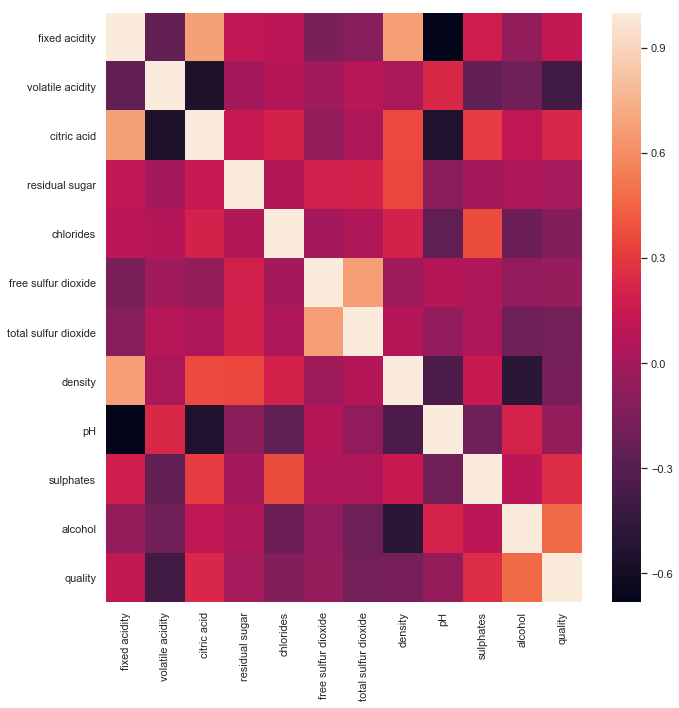

In [3]:
import seaborn as sns
cmap = sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=cmap, annot=False)
f.tight_layout()

We can see some relationships between each variables from above graph.<br />
The strongest correlation in the matrix above is the correlation between citric acid and fixed acidity, that makes sense, because most acids involved with wine are fixed. And we searched online, citric acid is actual belongs to fixed acidity. And that's also why citric acid has negatively correlated with volatile acidity. <br />
We can also know that between quality and other chemical substances, alcohol and citric acid has strong correlation with quality. We also find that "volatile acidity", "density" and "chlorides" has very weak correlation with quality.<br />
For "volatile acidity", we know that if the amount of volatile acidity is too high of levels can lead to an unpleasant, vinegar taste. Also, acidity can be measured in terms of PH, so we can remove this variable and keep the PH.<br />
For chlorides, we searched online and know that, if amount of chlorides is less than 0.85, they will not infect the red wine's taste. We can learn that the max amount of chlorides in our data is 0.6, so we can remove this variable.<br />
For the density calculate is related to the water, sugar and alcohol. We keep both sugar and alcohol, so we decided to remove density.<br />

In [4]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


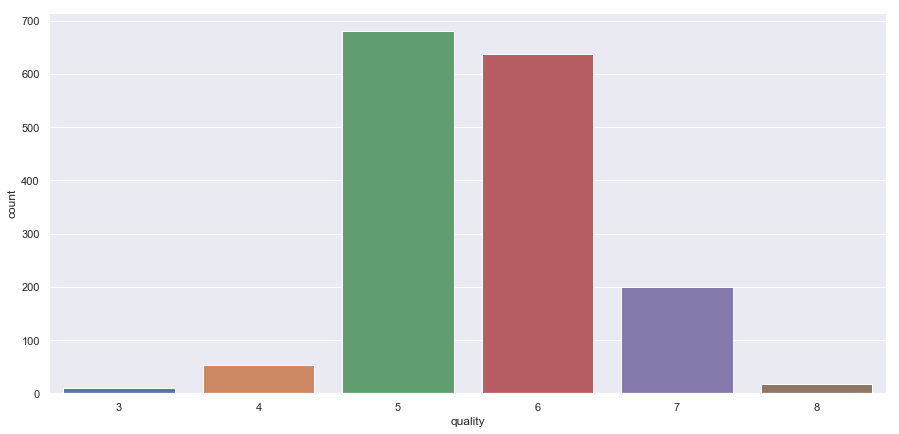

In [5]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['quality'])

I wanted to know the distribution of the number of wines rated, so I drew the diagram above. First of all, the grade of red wine is divided into 10 grades, from 1 to 10. A score of 1 indicates that the quality is very low, while a score of 10 indicates that the red wine has the highest quality. As can be seen from the above figure, it is normal distribution and the quality of red wine in the market is at a medium level. There is neither very bad quality wine nor very good quality wine on the market.

We have to predict a little more categories, there are 10 ratings in total, and we think the quality difference is one or two grades, the price difference is not too much. So we divided our quality rating into three groups, below 4 points are poor quality red wines, 5-6 points are medium quality red wines and 7 points or more are high quality red wines.

In [6]:
# group quality into low, median, high quality
for i in range(0,df.count().quality):
    if df.loc[i,'quality'] == 3 or df.loc[i,'quality'] == 4:
        df.loc[i,'quality'] = 0
    elif df.loc[i,'quality'] == 5 or df.loc[i,'quality'] == 6 :
        df.loc[i,'quality'] = 1
    else : 
        df.loc[i,'quality'] = 2
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,2
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,2
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [7]:
missing_data = pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])
missing_data

,Number of missing values
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


We also check the missing data of the our dataset. We find that there is no missing data, so we don't need to deal with it.

Here is the description of our final dataset. In our final dataset, we have 1599 instances and 12 features.<br />
- fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily). (float)<br />
- citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines. (float)<br />
- residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. (float)<br />
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. (float)<br />
- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. (float)<br />
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. (float)<br />
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. (float)<br />
- alcohol: the percent alcohol content of the wine. (float)<br />
- quality: output variable, divided into three groups: 0-poor quality, 1-medium quality, 2-high quality. (int)<br />

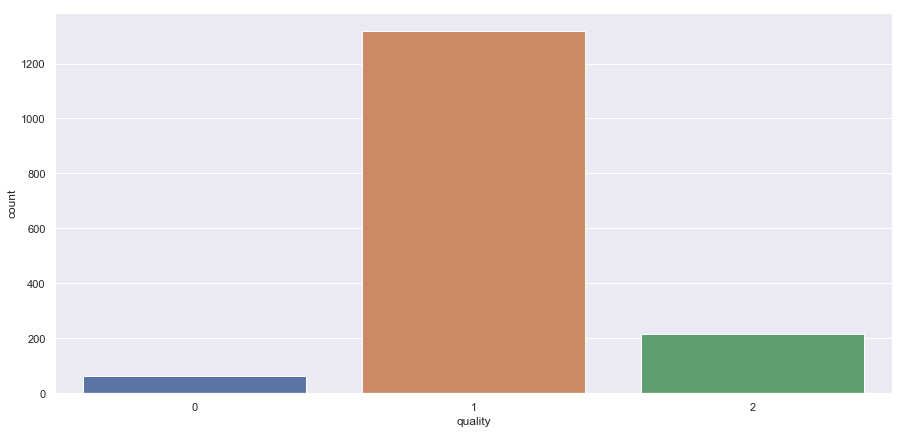

In [8]:
plt.figure(figsize=(15,7))
sns.countplot(x = df['quality'])

We can see from the figure that the proportion of medium-quality red wine is around 70%.

Then I drew the bar graph between the quality, alcohol and citric acid according to the correlation graph.

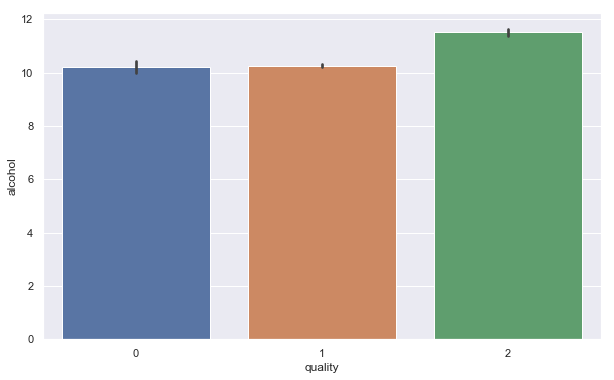

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

We can see that the alcohol content is mostly between 8 and 12, with a median of 10.2 and an average of 10.42. Most of the differences in alcohol content were not significant, but we could still see that red wines with the best taste and ratings had the highest alcohol content.<br />
At the same time, we found that although the difference in alcohol content was not significant, the alcohol content was determined by the degree of wine fermentation, so the change in alcohol content was closely related to the final score.

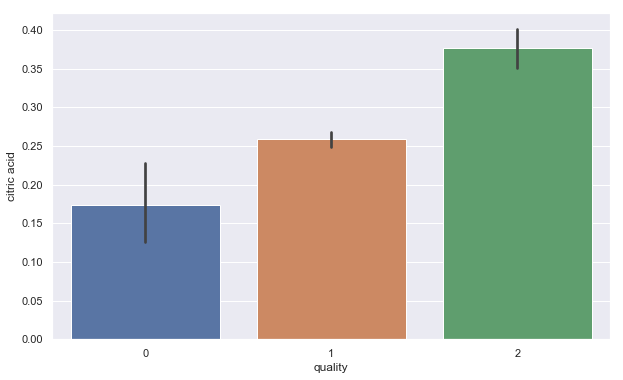

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y ='citric acid', data = df)

The relationship between citric acid and quality was found to be linear. Although the overall amount of citric acid was small, the higher the citric acid was, the higher the quality of red wine was. This makes sense because citric acid is an additive that, to a certain extent, can improve the freshness and taste of red wine.

#### Split Data

We decided to divide our data into training and testing data using an 80% training and 20% testing split. There are totally 1599 instances in our dateset, after spliting, we have 1279 instances, which is enough to train.And this size of the training set will also allow us to quickly get the training model. For the testing set, 320 instances can help us to check the accuracy of our model. If we split the data into 7:3, I think the data of the training set will be a little bit less, which will affect the accuracy of our model. If we split our data into 9:1, we will not have enough data to verify the accuracy of the model. So, we decided to use 80/20 split, it is appropriate for our dataset.

In [11]:
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

X = df.drop(["quality"], axis=1)
y = df["quality"]
#y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Training data instances number:",X_train.shape[0])
print("Testing data instances number:",X_test.shape[0])

Training data instances number: 1279
Testing data instances number: 320


## Modeling

Firstly, let's import the template shown on the class.   
In the template, class 'BinaryLogisticRegression' inherits from class 'BinaryLogisticRegressionBase', class 'VectorBinaryLogisticRegression' inherits from class 'BinaryLogisticRegression'. And the class 'LogisticRegression' uses the function '_get_gradient' in class 'VectorBinaryLogisticRegression'.

In [12]:
import numpy as np
from scipy.special import expit

class BinaryLogisticRegressionBase:
    # private:
    def __init__(self, eta, iterations=200,C=0.001):
        self.eta = eta
        self.iters = iterations
        self.C = C
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        return 'Base Binary Logistic Regression Object, Not Trainable'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):  #private in '_'
        return 1/(1+np.exp(-theta)) 
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    
# inherit from base class
class BinaryLogisticRegression(BinaryLogisticRegressionBase):
    #private:
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
        
    def _get_gradient(self,X,y):
        # programming \sum_i (yi-g(xi))xi
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        for (xi,yi) in zip(X,y):
            # the actual update inside of sum
            gradi = (yi - self.predict_proba(xi,add_bias=False))*xi 
            # reshape to be column vector and add to gradient
            gradient += gradi.reshape(self.w_.shape) 
        
        return gradient/float(len(y))
       
    # public:
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term  column of 1s
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 


class VectorBinaryLogisticRegression(BinaryLogisticRegression):
    # inherit from our previous class to get same functionality
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    # but overwrite the gradient calculation
    def _get_gradient(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)

    
class LogisticRegression:
    def __init__(self, eta, iterations=20):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = VectorBinaryLogisticRegression(self.eta,self.iters)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row
        

We use instructor's template to do the Logistic Regression and output the accuracy of it.

In [13]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(0.1,200)
lr.fit(X_train,y_train)

yhat = lr.predict(X_test)
#print(yhat)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.81875


We used 'steepest descent' first and the accuracy is 0.819, which is high enough to continue further works.

Then use SKLogisticRegression API to compare the accuracy of regression.

In [14]:
%%time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression

lr_sk = SKLogisticRegression() # all params default

lr_sk.fit(X_train,y_train)
print(np.hstack((lr_sk.intercept_[:,np.newaxis],lr_sk.coef_)))
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-0.33879308 -0.10768547  3.32195777  0.06961176  0.03022779  0.51619843
  -0.00365329 -0.01782196 -0.33787413  0.21931126 -0.14420151 -0.3546536 ]
 [ 1.46142447  0.10675482  0.30259554 -0.63700197 -0.07844977  0.90455554
  -0.00463588  0.01771461  1.48238338  1.80780544 -1.72259224 -0.70951619]
 [-1.32343934 -0.09976123 -2.90612124  0.31400655  0.11245479 -1.23439118
   0.01169066 -0.01812143 -1.33693467 -2.59350199  2.19468999  0.95522055]]
Accuracy of:  0.821875
CPU times: user 190 ms, sys: 41.4 ms, total: 232 ms
Wall time: 609 ms


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


We could find the accuracy of SKLogisticRegression API is little higer than 'steepest descent'.
### One-versus-all Logistic Regression and Customizable Regularization Classifier

We create a new class 'RegularizedBinaryLogisticRegression', and we set these three optimization techniques as private functions in this class, which are named '_steepest_get_gradient', '_stochastic_get_gradient' and '_newton_get_gradient'. We also set a classifier to determine which function to use depending on the input parameter.<br />

We create a new class 'RegularizedBinaryLogisticRegression', and we set these three optimization techniques as private functions in this class, which are named '_steepest_get_gradient', '_stochastic_get_gradient' and '_newton_get_gradient'.

The formula of steepest descent method as follows:<br />
$$gradient =\sum_{i=1}^M (y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))\mathbf{x}^{(i)}$$

The formula of stochastic method as follows:<br />
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \underbrace{\left((y^{(i)}-g(\mathbf{w}^T\mathbf{x}^{(i)}))\mathbf{x}^{(i)}-2C\cdot \mathbf{w}\right)}_{\text{approx. gradient}} \text{,   where   } i\in M$$ 
We random select data to train the model.

The formula of newton method as follows:<br />
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \cdot \underbrace{\mathbf{H}[l(\mathbf{w})]^{-1}}_{\text{inverse Hessian}}\cdot\underbrace{\nabla l(\mathbf{w})}_{\text{gradient}}$$
$$ \mathbf{w} \leftarrow \mathbf{w} + \eta \cdot \underbrace{\left[\mathbf{X}^T \cdot \text{diag}\left[g(\mathbf{X}\cdot\mathbf{w})(1-g(\mathbf{X}\cdot\mathbf{w}))\right] \cdot \mathbf{X} -2C \right]^{-1} }_{\text{inverse Hessian}} \cdot \underbrace{\mathbf{X}*y_{diff}}_{\text{gradient}}$$

For selecter, we rewrite the private functions-'_get_gradient' to determine which function to calculate the gradient and regularize it depending on the input parameters.<br />

In [15]:
%%time
from numpy.linalg import pinv
class RegularizedBinaryLogisticRegression(BinaryLogisticRegression):
    def __init__(self, technique="steepest", C=0.1, eta=0.1,reg="L1", **kwargs):
        self.technique = technique
        self.C = C
        self.reg = reg
        super().__init__(eta=eta, **kwargs)
        
    def _steepest_get_gradient(self,X,y):
        # print("steepest")
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    def _stochastic_get_gradient(self,X,y):
        # print("stochastic")
        #print(self.eta)
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return gradient
    
    def _newton_get_gradient(self,X,y):
        # print("newton")
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        
        return pinv(hessian) @ gradient

    def _get_gradient(self,X,y):
        if self.technique == "stochastic":
            gradient = self._stochastic_get_gradient(X, y)
        elif self.technique == "newton":
            gradient = self._newton_get_gradient(X, y)
        elif self.technique == "steepest":
            gradient = self._steepest_get_gradient(X, y)
        else:
            return
        
        if self.reg == "L1":
            # print("L1")
            gradient[1:] += np.sign(self.w_[1:]) * self.C  # exclude bias term
        elif self.reg == "L2":
            # derivative of the L2 Norm of the weights, exclude bias term  piecewise function np.sign
            gradient[1:] += -2 * self.w_[1:] * self.C  
        elif self.reg == "L1L2":
            gradient[1:] += (np.sign(self.w_[1:]) * self.C) + (-2 * self.w_[1:] * self.C)
        else:
            pass
                
        return gradient
    

CPU times: user 60 µs, sys: 1 µs, total: 61 µs
Wall time: 68.2 µs


We define the method to do regularization.<br />
We set a class 'RegularizedLogisticRegression' inherit from class 'LogisticRegression'. We initiate 'C' , 'eta' , 'technoque' , 'reg' and 'iters', which are all paremeters we need to do regularization. We rewrite the function 'fit' to call class 'RegularizedBinaryLogisticRegression' to regularizate the model to prevent overfitting.

For L1, we changed our objective function by adding in C + W, the formula as follows:
$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j w_j $$
For L2, we changed our objective function by adding in C + W'square, the formula as follows:
$$ l(\mathbf{w})_{reg} = l(\mathbf{w})_{old} - C\cdot\sum_j w_j^2 $$

In [16]:
# now redefine the Logistic Regression Function where needed
class RegularizedLogisticRegression(LogisticRegression):
    def __init__(self, eta=0.1, iters=20, technique="steepest", C=0.5, reg="L1", **kwargs):        
        # need to add to the original initializer 
        self.C = C
        self.eta = eta
        self.technique = technique
        self.reg = reg
        self.iters = iters
        # but keep other keywords
        super().__init__(eta=eta, **kwargs)
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      C=self.C,
                                                      technique = self.technique,
                                                      reg = self.reg)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T

### Comparison
We do the logistic regression using three methods.<br />
First, we do with steepest descent method.

In [17]:
from sklearn.metrics import accuracy_score

rlr_s = RegularizedLogisticRegression(eta=0.1, technique="steepest", C=0.01,iterations=200,reg="L1")
rlr_s.fit(X,y)
print(rlr_s)

yhat = rlr_s.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


MultiClass Logistic Regression Object with coefficients:
[[ 0.01763382 -0.16177242  0.17535479 -0.0840398   0.13862063 -0.01049725
  -0.28861056 -1.05652145  0.01939003  0.11733703 -0.04859649 -0.0733074 ]
 [ 0.16651955  0.64804717  0.24617854 -0.16761094 -0.30755586  0.05075677
   0.83231343  2.97079788  0.17936713  0.5662838  -0.09913216 -0.45538185]
 [-0.21905747 -0.65998771 -0.42734254  0.22997355  0.04962531 -0.06246044
  -0.73611078 -2.47783453 -0.23336861 -0.79452177  0.11277483  0.1102377 ]]
Accuracy of:  0.81875


The accuracy is 0.81875.<br />
Then, we do with stochastic method.

In [18]:
from sklearn.metrics import accuracy_score

rlr_t = RegularizedBinaryLogisticRegression(eta=0.1, technique="stochastic", C=0.01,iterations=100,reg="L1")
rlr_t.fit(X,y)
print(rlr_t)

yhat = rlr_t.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[ 1.05250566]
 [ 9.23611868]
 [ 0.45693758]
 [ 0.37576867]
 [ 3.27140363]
 [ 0.08428774]
 [12.49468359]
 [31.12924618]
 [ 1.0442813 ]
 [ 3.38165652]
 [ 0.73548756]
 [12.22665489]]
Accuracy of:  0.81875


The accuracy is 0.81875.<br />
Finally, we do with newton method.

In [28]:
from sklearn.metrics import accuracy_score

rlr_n = RegularizedBinaryLogisticRegression(eta=0.1,iterations=6,C=0.001, technique="newton", reg="L1")
rlr_n.fit(X,y)
print(rlr_n)

yhat = rlr_n.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Binary Logistic Regression Object with coefficients:
[[ 1.28334810e+01]
 [ 8.28235861e-03]
 [-1.11403770e+00]
 [ 4.39375881e-02]
 [ 1.84810560e-02]
 [-2.28918624e+00]
 [ 1.62663560e-04]
 [-7.92873855e-04]
 [-1.23672752e+01]
 [-7.39509295e-01]
 [ 9.38654051e-01]
 [ 3.16511102e-01]]
Accuracy of:  0.821875


The accuracy is 0.82.<br />

We could find the accuracies in these three method are almost the same. We could not find the optimized method accoding to this result, but we think the reason is dataset instead of the model.<br />
After analysing, we conclude that our data is specially divided into three groups, 0, 1 and 2. But the percentage of '1' is about 70%. Therefore, when we use these three methods to find the optimal solution, even the coefficients results are different, the predicted result tends to be biased into the class 1. So, this is the situation that accuracies are same even if the optimal weight w is different. <br />
We think if the input dataset is distributed evenly, we could find the optimized method through the classifier.

### Parameters Justify

Then, we did regularization. We try every regularization in every optimnization method, and put the accuracy into a accuracies list.

In [20]:
accuracies = {}

optimization_techniques =  ["stochastic", "steepest", "newton"]
regs = ["L1", "L2", "L1L2", "none"]

C_interval = np.linspace (0.01, 1, 100)

for technique in optimization_techniques:
    for reg in regs:
        name = technique + "_" + reg
        print(name)
        accuracies[name] = []
        for C in C_interval:
            if technique != "newton":
                rlr = RegularizedLogisticRegression(eta=0.1, reg=reg, technique=technique, C=C, iters=500)
                rlr.fit(X, y)
            else:
                rlr = RegularizedLogisticRegression(eta=0.1, reg=reg, technique=technique, C=C, iters=10)
                rlr.fit(X, y)
                

            yhat = rlr.predict(X_test)
            accuracies[name].append(accuracy_score(y_test, yhat))

stochastic_L1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


stochastic_L2
stochastic_L1L2
stochastic_none
steepest_L1
steepest_L2
steepest_L1L2
steepest_none
newton_L1
newton_L2
newton_L1L2
newton_none


In order to make the results more intuitive, we plot the accuracy list for every regularization situation. We compare them and try to find the best one.

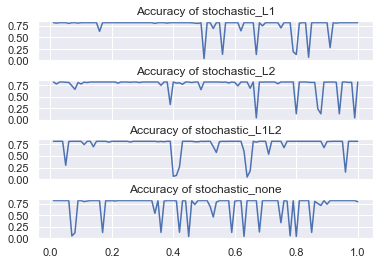

<Figure size 1440x720 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = C_interval
y_stochastic_L1 = accuracies['stochastic_L1']
y_stochastic_L2 = accuracies['stochastic_L2']
y_stochastic_L1L2 = accuracies['stochastic_L1L2']
y_stochastic_none = accuracies['stochastic_none']

plt.close('all')

f, axarr = plt.subplots(4, sharey=True)
# f.suptitle('Sharing both axes')
plt.figure(figsize=(20,10))
axarr[0].plot(x, y_stochastic_L1)
axarr[0].set_title('Accuracy of stochastic_L1')

axarr[1].plot(x, y_stochastic_L2)
axarr[1].set_title('Accuracy of stochastic_L2')

axarr[2].plot(x, y_stochastic_L1L2)
axarr[2].set_title('Accuracy of stochastic_L1L2')

axarr[3].plot(x, y_stochastic_none)
axarr[3].set_title('Accuracy of stochastic_none')

# Bring subplots close to each other.
f.subplots_adjust(hspace=0.5)
# Hide x labels and tick labels for all but bottom plot.
for ax in axarr:
    ax.label_outer()

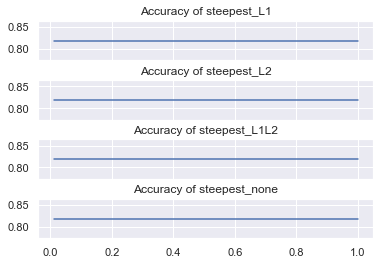

<Figure size 1440x720 with 0 Axes>

In [22]:
x = C_interval
y_steepest_L1 = accuracies['steepest_L1']
y_steepest_L2 = accuracies['steepest_L2']
y_steepest_L1L2 = accuracies['steepest_L1L2']
y_steepest_none = accuracies['steepest_none']

plt.close('all')

f, axarr = plt.subplots(4, sharey=True)
# f.suptitle('Sharing both axes')
plt.figure(figsize=(20,10))
axarr[0].plot(x, y_steepest_L1)
axarr[0].set_title('Accuracy of steepest_L1')

axarr[1].plot(x, y_steepest_L2)
axarr[1].set_title('Accuracy of steepest_L2')

axarr[2].plot(x, y_steepest_L1L2)
axarr[2].set_title('Accuracy of steepest_L1L2')

axarr[3].plot(x, y_steepest_none)
axarr[3].set_title('Accuracy of steepest_none')

# Bring subplots close to each other.
f.subplots_adjust(hspace=0.5)
# Hide x labels and tick labels for all but bottom plot.
for ax in axarr:
    ax.label_outer()

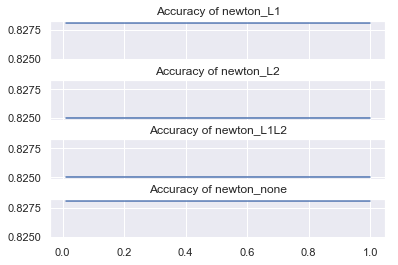

<Figure size 1440x720 with 0 Axes>

In [23]:
x = C_interval
y_newton_L1 = accuracies['newton_L1']
y_newton_L2 = accuracies['newton_L2']
y_newton_L1L2 = accuracies['newton_L1L2']
y_newton_none = accuracies['newton_none']

plt.close('all')

f, axarr = plt.subplots(4, sharey=True)
# f.suptitle('Sharing both axes')
plt.figure(figsize=(20,10))
axarr[0].plot(x, y_newton_L1)
axarr[0].set_title('Accuracy of newton_L1')

axarr[1].plot(x, y_newton_L2)
axarr[1].set_title('Accuracy of newton_L2')

axarr[2].plot(x, y_newton_L1L2)
axarr[2].set_title('Accuracy of newton_L1L2')

axarr[3].plot(x, y_newton_none)
axarr[3].set_title('Accuracy of newton_none')

# Bring subplots close to each other.
f.subplots_adjust(hspace=0.5)
# Hide x labels and tick labels for all but bottom plot.
for ax in axarr:
    ax.label_outer()

Above the plots, we could find that the accuracy does not change with the change of C in newton and steepest descent method. 

We try to justify our stochastic method through selecting parameter C, so we need to choose one regularization method to find the optimized C.<br />
We calculated the proportions of cases where the accuracy is over 80% for every regularization method and compare them to find the highest percentage proportion.

In [24]:
x = C_interval
y_stochastic_L1 = accuracies['stochastic_L1']
y_stochastic_L2 = accuracies['stochastic_L2']
y_stochastic_L1L2 = accuracies['stochastic_L1L2']
y_stochastic_none = accuracies['stochastic_none']

countL1 = 0
countL2 = 0
countL1L2 = 0
countnone = 0
for item in y_stochastic_L1:
    if item>0.8:
        countL1 = countL1+1
percent1 = countL1/len(y_stochastic_L1)
print("L1 regularization percentage of accuracy above 80%:",percent1*100,"%")
for item in y_stochastic_L2:
    if item>0.8:
        countL2 = countL2+1
percent2 = countL2/len(y_stochastic_L2)
print("L2 regularization percentage of accuracy above 80%:",percent2*100,"%")
for item in y_stochastic_L1L2:
    if item>0.8:
        countL1L2 = countL1L2+1
percent12 = countL1L2/len(y_stochastic_L1L2)
print("L1L2 regularization percentage of accuracy above 80%:",percent12*100,"%")
for item in y_stochastic_none:
    if item>0.8:
        countnone = countnone+1
percent0 = countnone/len(y_stochastic_none)
print("none regularization percentage of accuracy above 80%:",percent0*100,"%")

L1 regularization percentage of accuracy above 80%: 88.0 %
L2 regularization percentage of accuracy above 80%: 79.0 %
L1L2 regularization percentage of accuracy above 80%: 83.0 %
none regularization percentage of accuracy above 80%: 77.0 %


We could find L1 regularization has the highest percentage, so we decide to adjust C based on L1 regularization.

We zoom the plot of L1 regularization.

Text(0.5, 1.0, 'Accuracy of stochastic_L1')

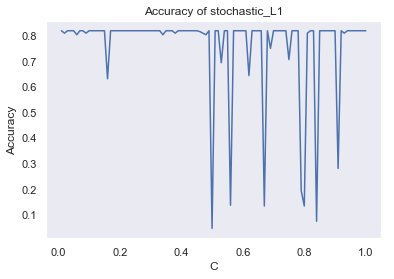

In [29]:
x = C_interval
y_stochastic_L1 = accuracies['stochastic_L1']
f, ax = plt.subplots()
ax.grid()
ax.plot(x, y_stochastic_L1)
plt.xlabel("C")
plt.ylabel("Accuracy")
ax.set_title('Accuracy of stochastic_L1')

The plot overall maintains a high degree of accuracy, and lower accuracy in the interval is focus on the C which is greater than 0.5. We could choose C where the accuracy is higher than 0.8.

### Data Snooping
Data snooping refers to statistical inference that the researcher decides to perform after looking at the data. In our opinion, there is no data snooping in our model. For previous data checking, such as whether there is missing data, is only for better modeling. In the subsequent modeling, we use the training set to set up model and testing set to test the accuracy of the model so as to select the optimal model. Finally, with the comparision, we find the model of stochastic method with L1 regularization fits our dataset best.

## Compare With Scikit-learn

We did a logistic regression analysis with skilearn, and compared the training time and accuracy with steepest descent method. For a more intuitive representation, we plotted the histogram of time and iteration times as a comparison.

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 8.34 µs
Steepest Time:  0.031025171279907227
Steepest Accuracy:  0.81875
CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 6.91 µs
Scikit Time:  0.024024009704589844
Scikit Accuracy:  0.821875


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


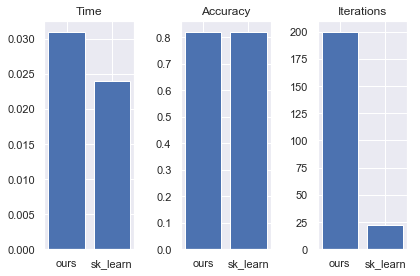

In [26]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
import time

%time

start = time.time()
rlr = RegularizedLogisticRegression(eta=0.1,iters=500, reg='L1',
                                   technique='steepest',C=0.02)

rlr.fit(X, y)
yhat = rlr.predict(X_test)
acc = accuracy_score(y_test,yhat)

end = time.time()
our_time = end - start

print("Steepest Time: ", our_time)
print("Steepest Accuracy: ",acc)

%time

start = time.time()

lrsk = SKLogisticRegression()
lrsk.fit(X, y)
yhat = lrsk.predict(X_test)
acc_sk = accuracy_score(y_test,yhat)

end = time.time()
sk_time = end - start
print("Scikit Time: ", sk_time)
print("Scikit Accuracy: ", acc_sk)

fig, axes = plt.subplots(nrows=1, ncols=3)
plt.setp(axes, xticks=[0, 1], xticklabels=['ours', 'sk_learn'])

y_axis = [our_time, sk_time]
x_axis = [0, 1]
plt.sca(axes[0])
plt.bar(x_axis, y_axis)
axes[0].set_title('Time')

plt.sca(axes[1])
y_axis = [acc, acc_sk]
x_axis = [0, 1]
plt.bar(x_axis, y_axis)
axes[1].set_title('Accuracy')

plt.sca(axes[2])
y_axis = [200, lr_sk.n_iter_]
x_axis = [0, 1]
plt.bar(x_axis, y_axis)
axes[2].set_title('Iterations')


plt.tight_layout()
plt.show()

We could find that with skilearn method, although the accuracy is almost the same but the training time is much shorter. Also, sk_learn's interation is less than 25.<br />
The skilearn is much better.

# Deployment

Parameter comparision: <br>
Our accuracy: 0.81<br>
SK_learn accuracy: 0.82<br>

Our time: 0.03<br>
SK_learn time: 0.02<br>

Our interations: 200<br>
SK_learn interations: <25 <br>

We can see that the accuray of our method and sk_learn as almost the same but the time used in our "best" logistic regression optimization 'Newton' procedure is about two times as the time used in sk-learn. Also the sk-learn even use largely fewer iterations than ours, the iterations are less than 25, but our method interation is around 200 times. This is natural, because sk_learn is a powerful and mature package, optimized by a lot of good engineers, and our method still needs to be optimized. So, we recommend to use sk_learn to deal with the dataset.<br />

However, our model is also successful. To a certain extent, its accuracy rate is considerable. However, we still need more data to train our model, so that it can be put into real life and make profits for the winery.


# Exceptional Work

We changed objective function from binary entropy to mean square error. When sample size must evaluate a target using the stand or fall of point estimation standard is always point estimation and parameter function of the distance of the true value, the most commonly used function is the square of the distance, because of the randomness of estimator, this function can be expected, so the mean square error is one of the most general standard evaluation point estimation, naturally, we want to estimate the mean square error as small as possible.

Then we use BFGS algrithm intead of two gradient approach such us newton method gradient. It is similar with newthon but it is better than newton. 
The characteristics of Newton's method are: fast convergence, less iteration. However, when the matrix is very dense, the computation of each iteration is very heavy. As the data size increases, the Hessian matrix will become larger and the required storage space will increase. Sometimes it is too big to calculate. Therefore, Newton's method is no longer applicable to the calculation of massive data.
BFGS is an approximation matrix of Hessian matrix based on Newton method. The convergence rate is between gradient descent method and Newton method. Like Newton's method, the quasi - Newton method can not deal with large data because of calculation. Quantities and storage space can be expensive. Although each iteration of quasi - Newton method does not guarantee the optimal direction as Newton method, but the approximate matrix is always. Positive definite, so the algorithm is always searching in the direction of optimization.

In [27]:
from scipy.optimize import fmin_bfgs
from sklearn.metrics import mean_squared_error
class BFGSBinaryLogisticRegression(BinaryLogisticRegression):
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return mean_squared_error(g,y)

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # just overwrite fit function
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                            np.zeros((num_features,1)), # starting point
                            fprime=self.objective_gradient, # gradient function
                            args=(Xb,y,self.C), # extra args for gradient and objective function
                            gtol=1e-03, # stopping criteria for gradient, |v_k|
                            maxiter=self.iters, # stopping criteria iterations
                            disp=False)
        
        self.w_ = self.w_.reshape((num_features,1))
            
bfgslr = BFGSBinaryLogisticRegression(_,10,C=0.001) # note that we need only a few iterations here

bfgslr.fit(X,y)
yhat = bfgslr.predict(X)
print(bfgslr)
print('Accuracy of: ',accuracy_score(y,yhat))

Binary Logistic Regression Object with coefficients:
[[0.02042951]
 [0.17302302]
 [0.00994945]
 [0.00615788]
 [0.05245948]
 [0.00172202]
 [0.3206586 ]
 [0.91171087]
 [0.02035979]
 [0.06744211]
 [0.01393127]
 [0.21830735]]
Accuracy of:  0.8248905565978737


From the accuracy, we can see that the accuracy of BFGS approach to predict the mean square error is higher than other method obviously in this dataset. Therefore, we can get this method to predict the wine quality which is better to get a exact and satisfied result.